<a href="https://colab.research.google.com/github/AnnSenina/python_hse_2024/blob/main/notebooks/%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D1%80_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пример решения

Домашнее задание не является обязательным к выполнению (но если сделаете и захотите прислать, конечно, я проверю)

- найти интересующий вас набор данных по любой теме
- подготовить данные для анализа:
  - проверить наличие пропусков (если они есть - удалить / заполнить)
  - изменить тип данных в pandas, перекодировать переменные (если требуется)
  - проверить данные на выбросы

Если не нашли данные, но хотите потренироваться: ниже будет датасет-пример [отсюда](https://www.kaggle.com/datasets/katyjqian/charity-navigator-scores-expenses-dataset)

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/python_hse_2024/main/data/CLEAN_charity_data.csv')
df.head(3)

,ascore,category,description,ein,tot_exp,admin_exp_p,fund_eff,fund_exp_p,program_exp_p,fscore,...,motto,name,tot_rev,score,state,subcategory,size,program_exp,fund_exp,admin_exp
0,100.0,Environment,Working with Oregonians to enhance our quality...,93-0642086,917313.0,0.101,0.18,0.184,0.714,88.61,...,Great communities. Working lands. Iconic Places.,1000 Friends of Oregon,1022513.0,91.94,OR,Environmental Protection and Conservation,small,654961.482,168785.592,92648.613
1,89.0,"Arts, Culture, Humanities",Serving the metropolitan Baltimore area and th...,31-1770828,5053059.0,0.231,0.05,0.032,0.735,82.85,...,88.1 FM -. Your NPR News Station,WYPR,5685761.0,85.59,MD,Public Broadcasting and Media,mid,3713998.365,161697.888,1167256.629
2,70.0,Religion,VSS Catholic Communications is dedicated to an...,91-1857425,1891500.0,0.114,0.17,0.197,0.687,86.74,...,Spirit Catholic Radio Network,VSS Catholic Communications,2140836.0,76.80,NE,Religious Media and Broadcasting,small,1299460.500,372625.500,215631.000


In [ ]:
df['leader_comp'] = df['leader_comp'].fillna(df['leader_comp'].median())
df['leader_comp_p'] = df['leader_comp_p'].fillna(df['leader_comp_p'].median())
df = df.dropna(subset=['motto']) # девиз - уникальное, если он нам важен, можно удалить пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8394 entries, 0 to 8407
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ascore         8394 non-null   float64
 1   category       8394 non-null   object 
 2   description    8394 non-null   object 
 3   ein            8394 non-null   object 
 4   tot_exp        8394 non-null   float64
 5   admin_exp_p    8394 non-null   float64
 6   fund_eff       8394 non-null   float64
 7   fund_exp_p     8394 non-null   float64
 8   program_exp_p  8394 non-null   float64
 9   fscore         8394 non-null   float64
 10  leader         8394 non-null   object 
 11  leader_comp    8394 non-null   float64
 12  leader_comp_p  8394 non-null   float64
 13  motto          8394 non-null   object 
 14  name           8394 non-null   object 
 15  tot_rev        8394 non-null   float64
 16  score          8394 non-null   float64
 17  state          8394 non-null   object 
 18  subcategory  

In [ ]:
df.describe(include='all')
# size - порядкова шкала, можно перекодировать

,ascore,category,description,ein,tot_exp,admin_exp_p,fund_eff,fund_exp_p,program_exp_p,fscore,...,motto,name,tot_rev,score,state,subcategory,size,program_exp,fund_exp,admin_exp
count,8394.000000,8394,8394,8394,8.394000e+03,8394.000000,8394.000000,8394.000000,8394.000000,8394.000000,...,8394,8394,8.394000e+03,8394.000000,8394,8394,8394,8.394000e+03,8.394000e+03,8.394000e+03
unique,NaN,11,8376,8394,NaN,NaN,NaN,NaN,NaN,NaN,...,7691,8392,NaN,NaN,53,37,3,NaN,NaN,NaN
top,NaN,Human Services,Vision,93-0642086,NaN,NaN,NaN,NaN,NaN,NaN,...,Live United,United Way of Forsyth County,NaN,NaN,CA,Social Services,small,NaN,NaN,NaN
freq,NaN,2378,4,1,NaN,NaN,NaN,NaN,NaN,NaN,...,155,2,NaN,NaN,989,674,4043,NaN,NaN,NaN
mean,90.731475,NaN,NaN,NaN,1.449599e+07,0.105749,0.108041,0.087660,0.805088,85.961004,...,NaN,NaN,1.583978e+07,86.879556,NaN,NaN,NaN,1.244114e+07,8.934351e+05,1.139328e+06
std,9.761280,NaN,NaN,NaN,6.949230e+07,0.063410,0.087783,0.064593,0.093970,9.713376,...,NaN,NaN,7.563652e+07,8.018723,NaN,NaN,NaN,6.354516e+07,4.359389e+06,4.366121e+06
min,28.000000,NaN,NaN,NaN,5.321300e+04,0.001000,0.010000,0.001000,0.047000,0.000000,...,NaN,NaN,-2.049209e+06,14.480000,NaN,NaN,NaN,3.500383e+04,3.328500e+02,3.348400e+02
25%,89.000000,NaN,NaN,NaN,1.943350e+06,0.063000,0.050000,0.045000,0.757000,81.130000,...,NaN,NaN,2.023488e+06,83.270000,NaN,NaN,NaN,1.509452e+06,1.422807e+05,1.790518e+05
50%,93.000000,NaN,NaN,NaN,3.656226e+06,0.095000,0.090000,0.077000,0.814000,87.470000,...,NaN,NaN,3.954983e+06,88.320000,NaN,NaN,NaN,2.930645e+06,2.935981e+05,3.438048e+05
75%,97.000000,NaN,NaN,NaN,8.867154e+06,0.135000,0.140000,0.115000,0.865000,92.500000,...,NaN,NaN,9.792164e+06,92.020000,NaN,NaN,NaN,7.217593e+06,6.428886e+05,7.751779e+05


In [ ]:
# size - порядкова шкала, можно перекодировать
df['size'] = df['size'].apply(lambda x: 1 if x == 'small' else (2 if x == 'mid' else 3))

In [ ]:
# на будущее - 11 категорий, но шкала номинальная:
pd.get_dummies(df, columns=['category'], dtype=int)

# можно разом добавить 11 столбцов, заполненных 0 или 1

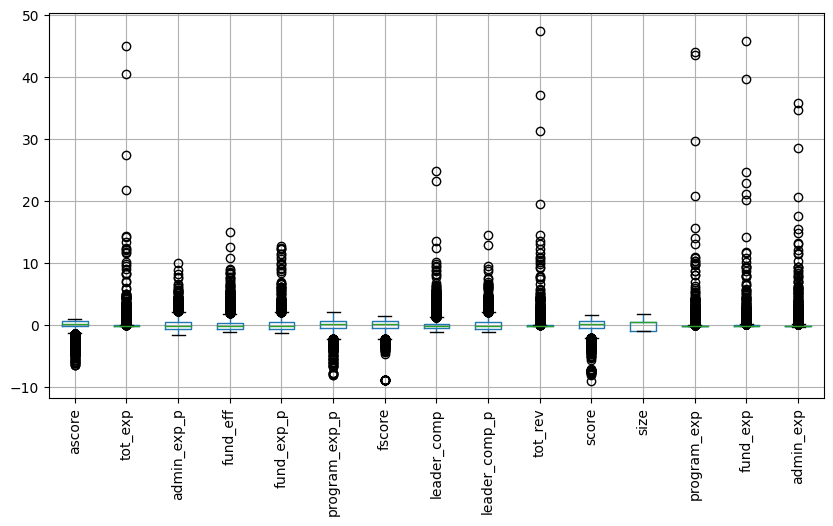

In [ ]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

def scale_features(df):
    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    return scaled

df_num = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 5))
scale_features(df_num).boxplot()
plt.xticks(rotation=90);

In [ ]:
# напишем функцию, которая посчитает выбросы в каждом столбеце:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

outliers_count = df_num.apply(detect_outliers)
outliers_count

ascore            637
tot_exp          1060
admin_exp_p       287
fund_eff          330
fund_exp_p        233
program_exp_p     206
fscore            169
leader_comp       622
leader_comp_p     316
tot_rev          1044
score             272
size                0
program_exp      1082
fund_exp          902
admin_exp        1036
dtype: int64

In [ ]:
# поскольку у нас всего 8300+ значений, можно попробовать отфильтровать выбросы по самому шумному столбцу program_exp:

d = df.describe()['program_exp']['75%'] - df.describe()['program_exp']['25%']

print(len(df[df['program_exp'] > df.describe()['program_exp']['75%'] + 1.5 * d]), 'выбросов справа')
print(len(df[df['program_exp'] < df.describe()['program_exp']['25%'] - 1.5 * d]), 'выбросов слева')


1082 выбросов справа
0 выбросов слева


In [ ]:
df = df[df['program_exp'] <= df.describe()['program_exp']['75%'] + 1.5 * d]
df.shape

(7125, 23)

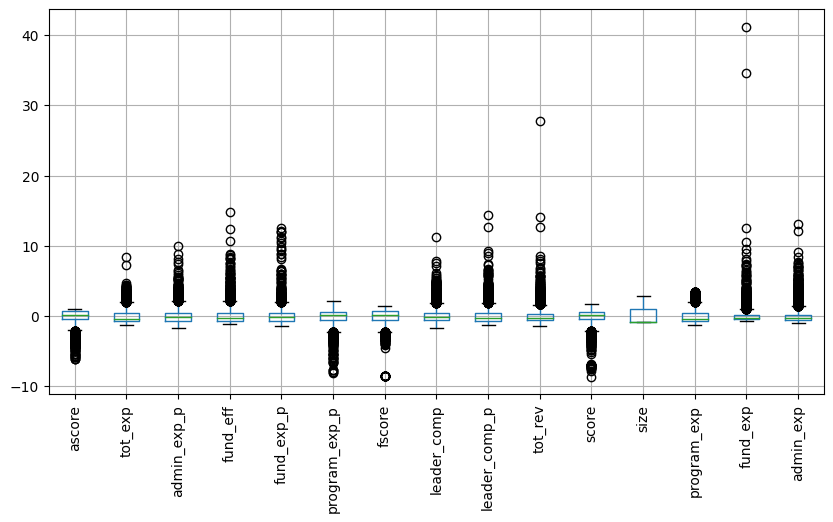

In [ ]:
df_num = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 5))
scale_features(df_num).boxplot()
plt.xticks(rotation=90);

In [ ]:
outliers_count = df_num.apply(detect_outliers)
outliers_count

# выбросов стало значительно меньше
# можно продолжать или начать анализ

ascore           339
tot_exp          471
admin_exp_p      251
fund_eff         212
fund_exp_p       207
program_exp_p    197
fscore           140
leader_comp      333
leader_comp_p    307
tot_rev          453
score            223
size               0
program_exp      464
fund_exp         489
admin_exp        560
dtype: int64

### Бонус

Есть библиотеки, которые могут проверять это за вас:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/python_hse_2024/main/data/CLEAN_charity_data.csv')

In [ ]:
!pip install clean-df

In [ ]:
from clean_df import CleanDataFrame
cdf = CleanDataFrame(
        df=df,             # the dataframe to be cleaned
        max_num_cat=11      # maximum number of unique values in a column to be
        )

Duplicated Rows
No duplicated rows.


Numerical Columns Optimization
These numarical columns can be down graded:

         columns_to_convert
-------  ------------------------------------------------------------------------------
uint8    ascore
float32  program_exp, fund_exp, admin_exp
uint32   tot_exp, leader_comp
int64    tot_rev
float16  admin_exp_p, fund_eff, fund_exp_p, program_exp_p, fscore, leader_comp_p, score 


Categorical Columns Optimization
These columns can be converted to categorical:

          unique_values
--------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
category  Environment, Arts, Culture, Humanities, Religion, Human Services, Education, Animals, International, Health, Community Development, Human and Civil Rights, Research and Public Policy
size      small, mid, big 


Outliers
Outliers are:

                 outliers_lowe

<Axes: >

<Axes: >

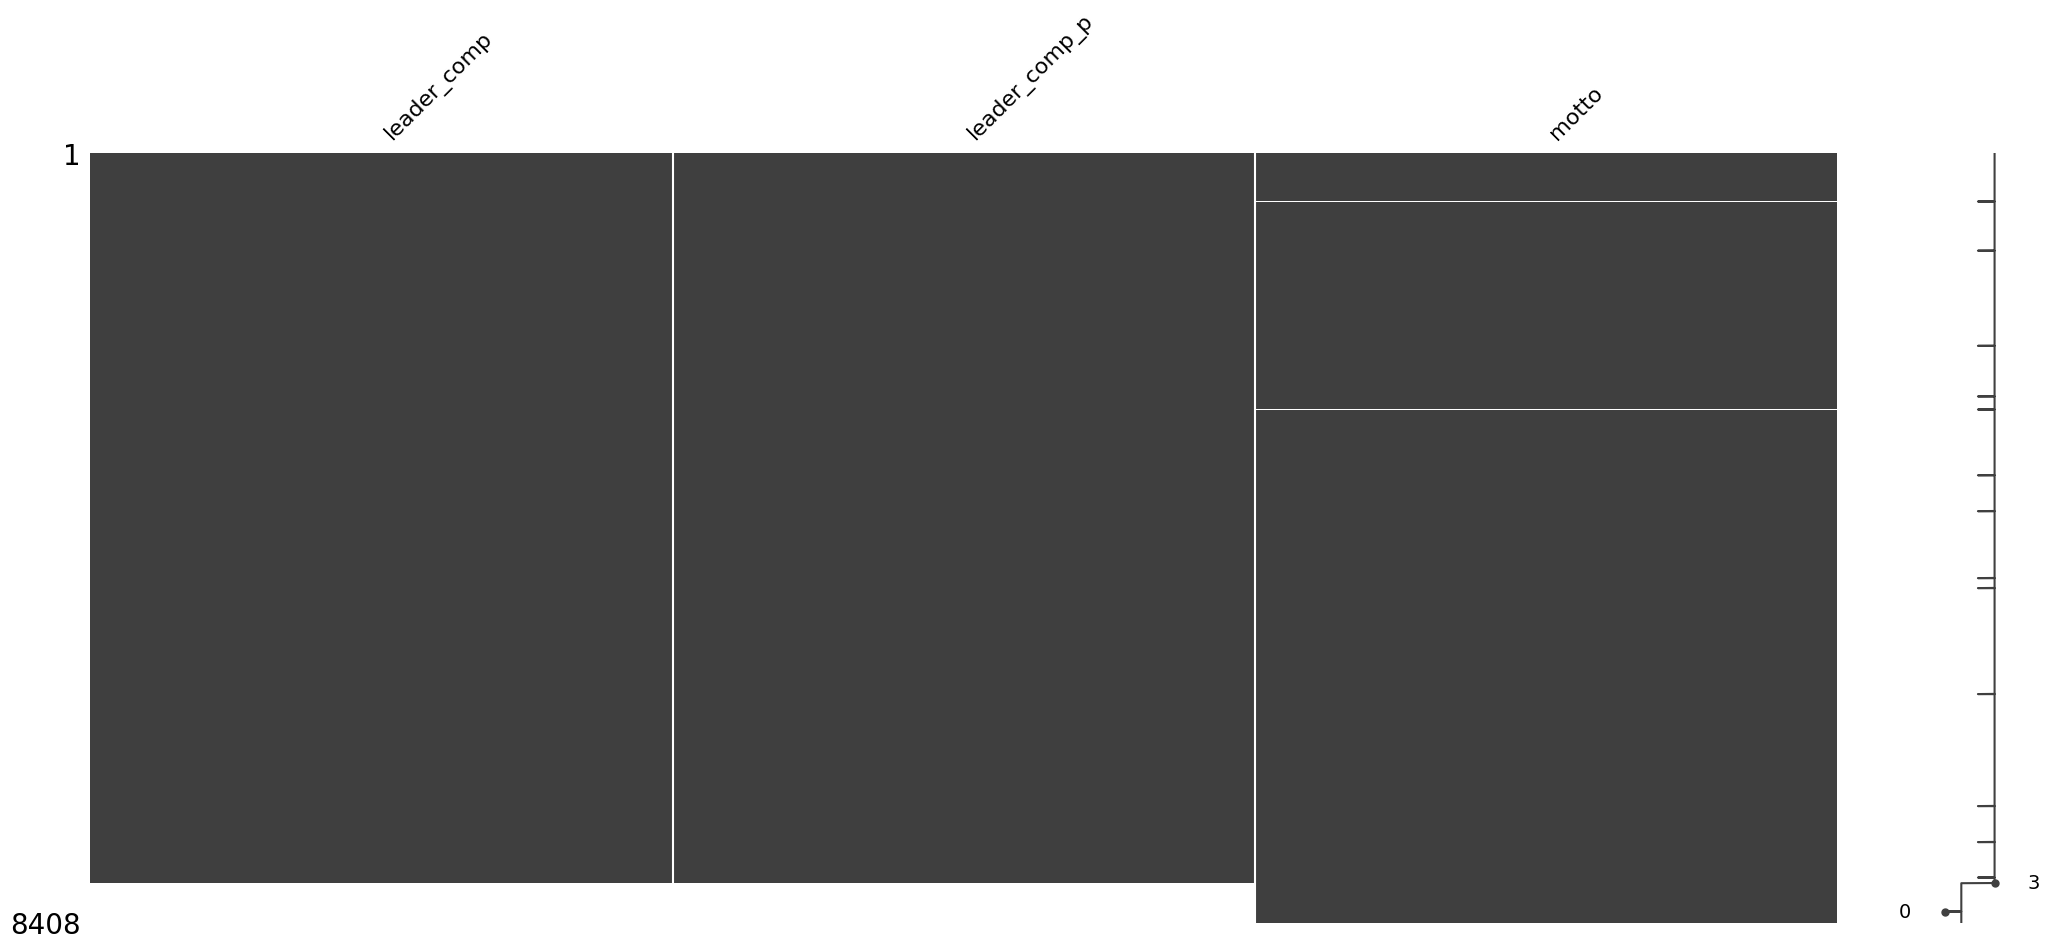

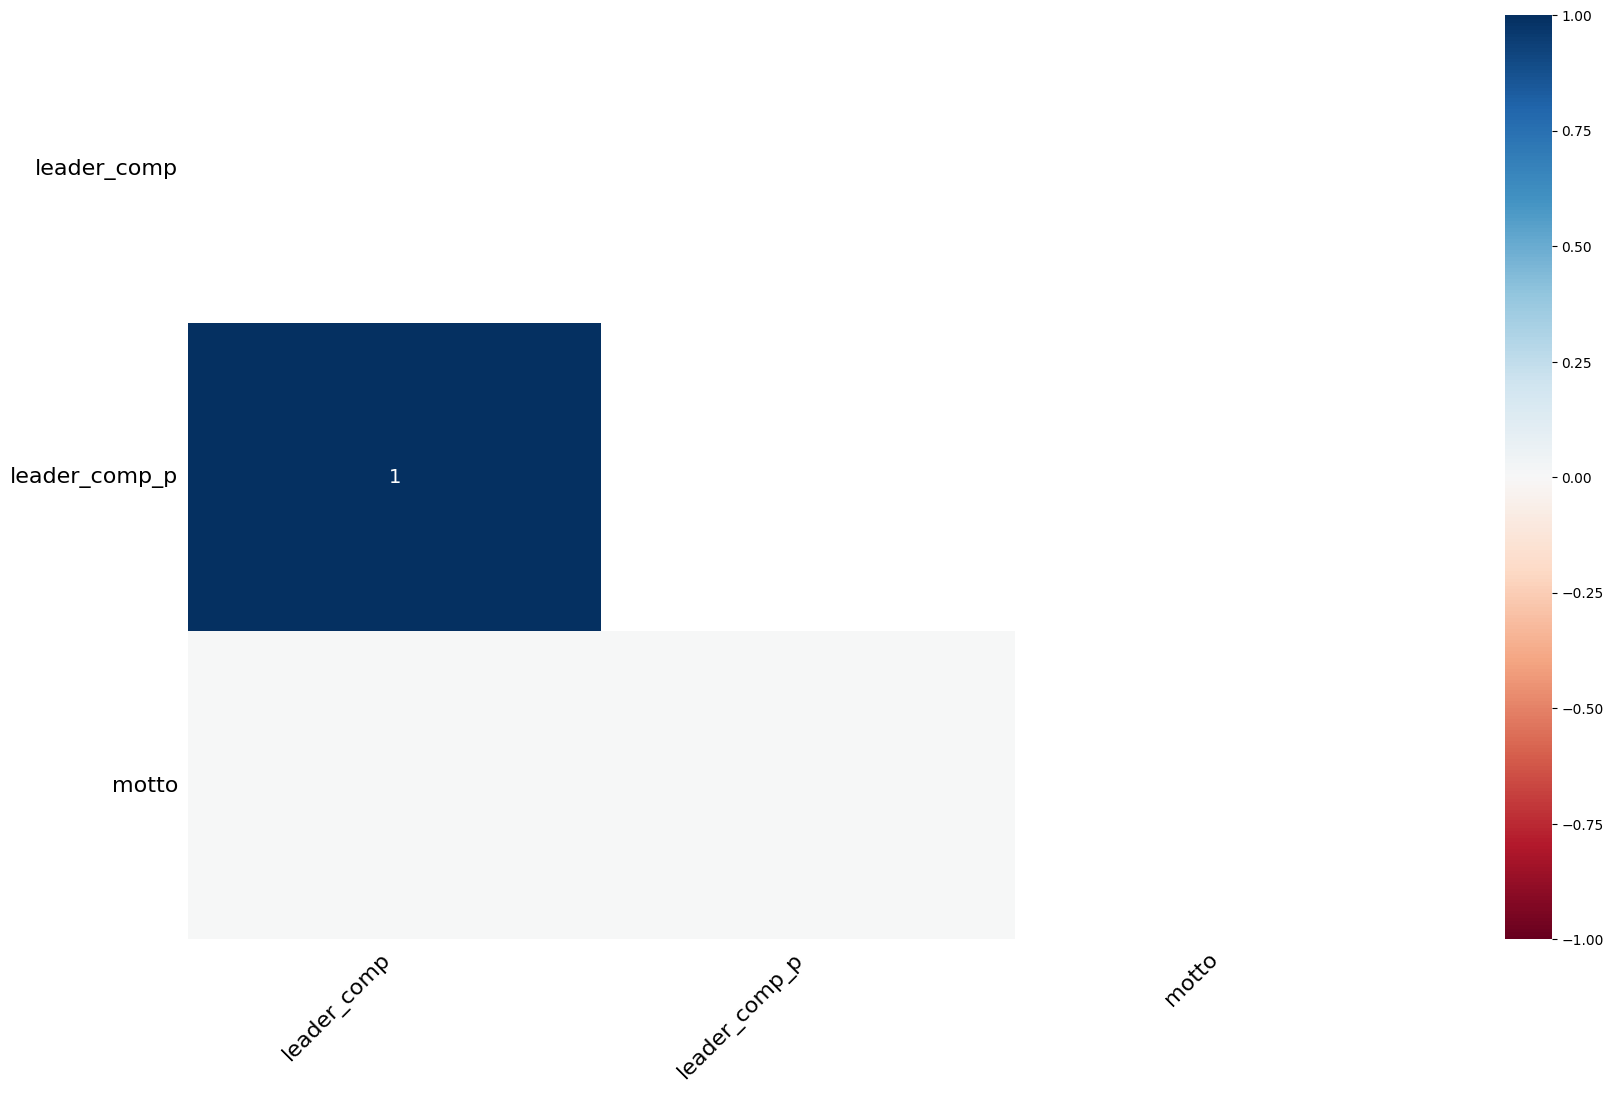

In [ ]:
cdf.report(
        show_matrix=True,   # show matrix missing values (from missingno package), default is True
        show_heat=True,     # show heat missing values (from missingno package), default is True
        matrix_kws={},      # if need to pass any arguments to matrix plot, default is {}
        heat_kws={}         # if need to pass any arguments to heat plot, default is {}
        )